In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from multiprocessing import Pool
from rebound import M_to_f

In [32]:
N = 5000
es = [0.01, 0.03, 0.1]
n = 1
P = 2*np.pi/n
# from Harbison et al. 2011
B_over_C = 0.87
A_over_C = 0.58
aspher = B_over_C - A_over_C
t = np.arange(0, N*P, P)
t0 = 0
Omega0s = np.arange(0*n, 3*n, 0.1*n)
Psi0s = np.arange(0, 2*np.pi, 1)

def func(t, y, e):
    M = np.fmod(n*t, 2*np.pi)
    f = M_to_f(e, M)
    return [-1.5*n**2*((1 + e*np.cos(f))/(1 - e**2))**3 * aspher * np.sin(2*(y[1] - f)), y[0]]

def solveOde(e):
    Omega0, Psi0 = 1.01, np.pi/2+0.01
    return solve_ivp(func, [t[0],t[-1]], [Omega0, Psi0], t_eval=t, args=(e,))


In [33]:
pool = Pool(10)
# y = list(map(solveOde, es))
results = np.array(pool.map(solveOde, es))

running 0.29000000000000004


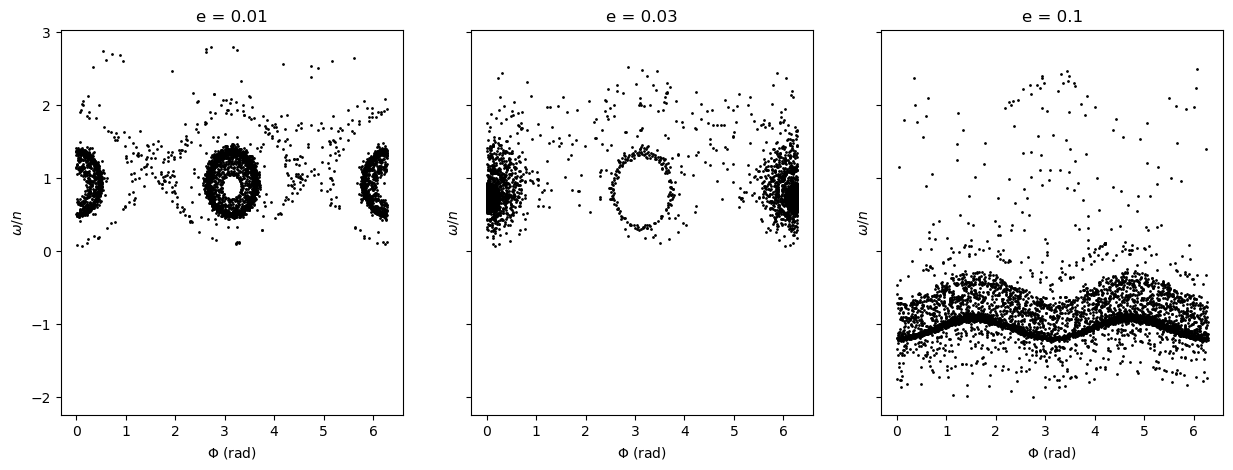

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)
for e, ax, res in zip(es, axs, results):
        ax.plot(np.remainder(res.y[1], 2*np.pi), res.y[0], 
                marker='o', markersize=1, linestyle='None', c='k')
        ax.set_xlabel('$\Phi$ (rad)')
        ax.set_ylabel('$\omega/n$')
        ax.set_title('e = {}'.format(e))
# text_x = 0.02*(plt.xlim()[1] - plt.xlim()[0]) + plt.xlim()[1]
# for p,q in [(1,2), (1,1), (3,2), (2,1), (5,2)]:
#     plt.axhline(p/q*n, color='k', linestyle='--')
#     plt.text(text_x, p/q*n, '{}:{}'.format(p,q), va='center')

    # plt.savefig('aspher_{}.png'.format(aspher))